In [1]:
import pandas as pd
import numpy as np
import os
from env import get_db_url
import wrangle
import seaborn as sns
from statistics import stdev
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split


In [2]:
df = wrangle.get_zillow_data()

In [3]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df = wrangle.prepare_zillow_data(df)

/Users/lochlyn/Codeup/codeup-data-science/regression-exercises/wrangle.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['County_Code'] = df.apply(lambda row: counties(row), axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County
4,4,2.0,3633,296425,2005,6941.39,Los Angeles County
6,3,4.0,1620,847770,2011,10244.94,Los Angeles County
7,3,2.0,2077,646760,1926,7924.68,Los Angeles County
18,3,1.0,1244,169471,1950,2532.88,Los Angeles County
19,3,2.0,1300,233266,1950,3110.99,Los Angeles County


array([[<AxesSubplot:title={'center':'Number_of_Bedrooms'}>,
        <AxesSubplot:title={'center':'Number_of_Bathrooms'}>],
       [<AxesSubplot:title={'center':'Square_Footage'}>,
        <AxesSubplot:title={'center':'Tax_Appraised_Value'}>],
       [<AxesSubplot:title={'center':'Year_Built'}>,
        <AxesSubplot:title={'center':'Tax_Assessed'}>]], dtype=object)

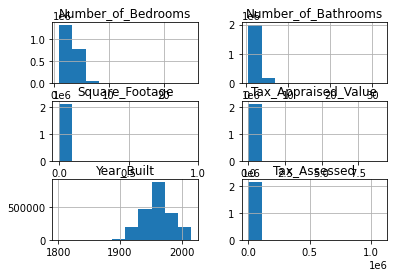

In [6]:
df.hist()

In [7]:
def split_zillow_data(df):
    ''' This function splits the cleaned dataframe into train, validate, and test 
    datasets and statrifies based on the target - Tax_Appraised_Value.'''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    
    return train, validate, test

In [8]:
train, validate, test = split_zillow_data(df)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195534 entries, 2014110 to 1255415
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Number_of_Bedrooms   1195534 non-null  int64  
 1   Number_of_Bathrooms  1195534 non-null  float64
 2   Square_Footage       1195534 non-null  int64  
 3   Tax_Appraised_Value  1195534 non-null  int64  
 4   Year_Built           1195534 non-null  int64  
 5   Tax_Assessed         1195534 non-null  float64
 6   County               1195534 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 73.0+ MB


### Application and visualization of scalers

In [10]:
columns_to_scale = ['Number_of_Bedrooms','Number_of_Bathrooms', 'Square_Footage']

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

In [12]:
train_scaled.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County
2014110,0.058824,0.047619,0.001729,412297,1956,5127.84,Los Angeles County
432230,0.117647,0.047619,0.000847,196290,1959,2380.98,Los Angeles County
1724453,0.176471,0.047619,0.001340,336456,1950,4213.56,Los Angeles County
1237258,0.235294,0.079365,0.003084,612600,1989,6146.96,Orange County
2037405,0.176471,0.111111,0.003429,716009,1984,8115.19,Los Angeles County


Text(0.5, 1.0, 'Scaled')

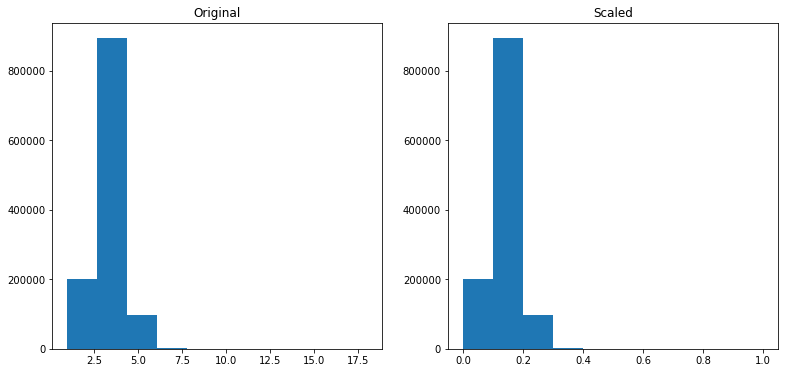

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Number_of_Bedrooms)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Number_of_Bedrooms)
plt.title('Scaled')

In [14]:
scaler = sklearn.preprocessing.StandardScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

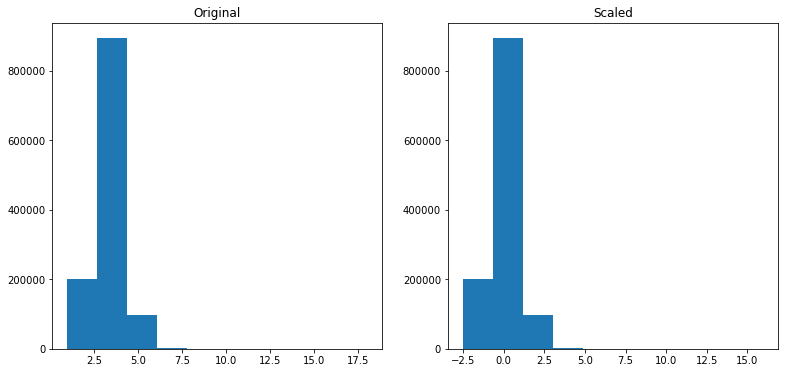

In [15]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Number_of_Bedrooms)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Number_of_Bedrooms)
plt.title('Scaled')

In [16]:
scaler = sklearn.preprocessing.RobustScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

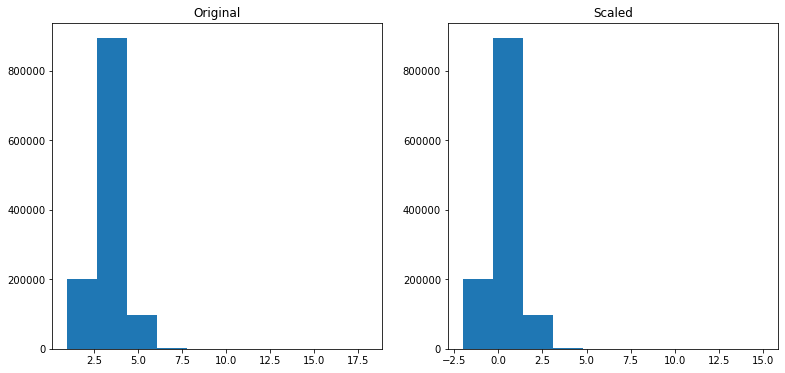

In [17]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Number_of_Bedrooms)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Number_of_Bedrooms)
plt.title('Scaled')

In [18]:
# instructor provided code duting review
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

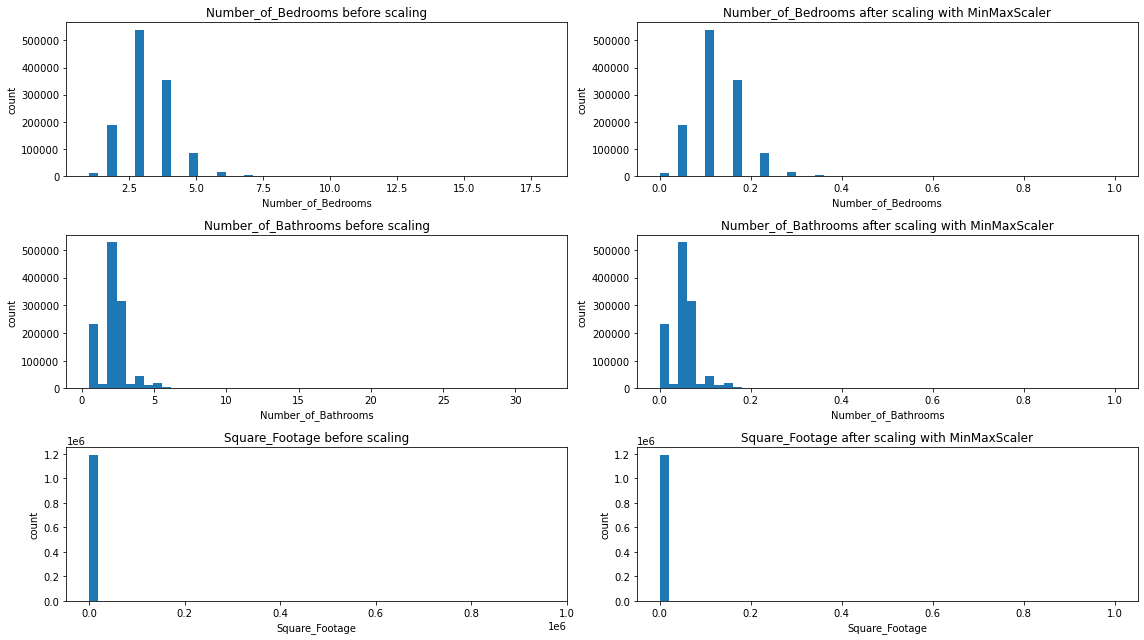

In [19]:
# MinMaxScaler Applied
visualize_scaler(scaler=sklearn.preprocessing.MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### Inverse

In [20]:
scaler = sklearn.preprocessing.RobustScaler()
original_data = train[['Number_of_Bathrooms']]
scaled_data = scaler.fit_transform(original_data)

In [21]:
original_data[:3]

,Number_of_Bathrooms
2014110,2.0
432230,2.0
1724453,2.0


In [22]:
scaled_data[:3]

array([[0.],
       [0.],
       [0.]])

In [23]:
scaler.inverse_transform(scaled_data)[:3]

array([[2.],
       [2.],
       [2.]])

### QuantileTransformer

In [24]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

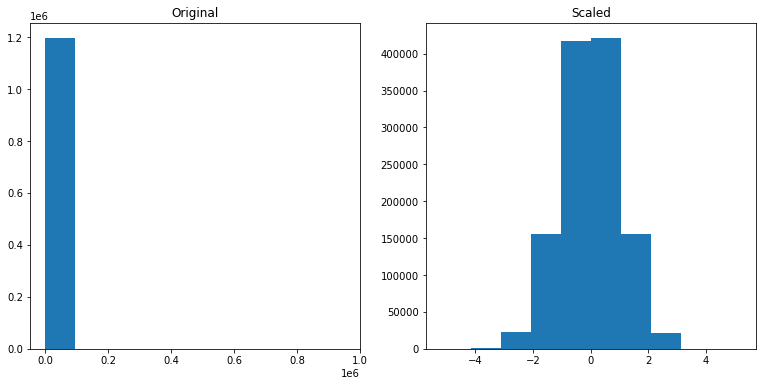

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.Square_Footage)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Square_Footage)
plt.title('Scaled')

In [26]:
scaler = sklearn.preprocessing.QuantileTransformer()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

Text(0.5, 1.0, 'Scaled')

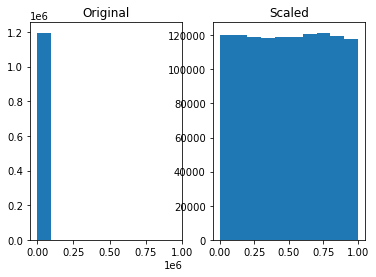

In [27]:
plt.subplot(121)
plt.hist(train.Square_Footage)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.Square_Footage)
plt.title('Scaled')